In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('data/dati/titanic3.csv')

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body',
       u'home.dest'],
      dtype='object')

In [5]:
titanic.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,NaN
50%,3.000000,0.000000,0.000000,0.000000,NaN
75%,3.000000,1.000000,1.000000,0.000000,NaN
max,3.000000,1.000000,8.000000,9.000000,328.000000


In [6]:
titanic['body'] = titanic['body'].fillna(titanic['body'].median())

In [7]:
titanic.describe()

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027,155.537051
std,0.837836,0.486055,1.041658,0.865560,29.639390
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,155.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,155.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


In [8]:
def conversion_cat_to_numeric(col, data):
    for name in col:
        column = pd.Categorical.from_array(data[name])
        data[name] = column.codes

In [9]:
conversion_cat_to_numeric(['name','sex', 'cabin', 'embarked'], titanic)

In [10]:
titanic.drop('home.dest', axis=1, inplace=True)

In [11]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,21,0,29,0,0,24160,"211,3375",43,2,2,155.0
1,1,1,23,1,"0,9167",1,2,113781,"151,5500",79,2,11,155.0
2,1,0,24,0,2,1,2,113781,"151,5500",79,2,NaN,155.0
3,1,0,25,1,30,1,2,113781,"151,5500",79,2,NaN,135.0
4,1,0,26,0,25,1,2,113781,"151,5500",79,2,NaN,155.0


In [12]:
titanic.drop(['age', 'fare'], axis = 1, inplace=True)

In [13]:
titanic.drop('boat', axis=1, inplace=True)

In [14]:
titanic.describe()

,pclass,survived,name,sex,sibsp,parch,cabin,embarked,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,652.689076,0.644003,0.498854,0.385027,21.040489,1.488923,155.537051
std,0.837836,0.486055,377.309849,0.478997,1.041658,0.865560,47.821397,0.819809,29.639390
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000
25%,2.000000,0.000000,326.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,155.000000
50%,3.000000,0.000000,652.000000,1.000000,0.000000,0.000000,-1.000000,2.000000,155.000000
75%,3.000000,1.000000,979.000000,1.000000,1.000000,0.000000,-1.000000,2.000000,155.000000
max,3.000000,1.000000,1306.000000,1.000000,8.000000,9.000000,185.000000,2.000000,328.000000


### Generating new features

We can also generate new features. Here are some ideas:

    The length of the name -- this could pertain to how rich the person was, and therefore their position in the Titanic.
    The total number of people in a family (SibSp + Parch).

An easy way to generate features is to use the .apply method on pandas dataframes. This applies a function you pass in to each element in a dataframe or series. We can pass in a lambda function, which enables us to define a function inline.

To write a lambda function, you write lambda x: len(x). x will take on the value of the input that is passed in -- in this case, the passenger name. The function to the right of the colon is then applied to x, and the result returned. The .apply method takes all of these outputs and constructs a pandas series from them. We can assign this series to a dataframe column.

In [15]:
titanic["FamilySize"] = titanic["sibsp"] + titanic["parch"]

In [ ]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pandas.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Feature engineering is the most important part of any machine learning task, and there are lots more features we could calculate. But we also need a way to figure out which features are the best.

One way to do this is to use univariate feature selection. This essentially goes column by column, and figures out which columns correlate most closely with what we're trying to predict (Survived).

As usual, sklearn has a function that will help us with feature selection, SelectKBest. This selects the best features from the data, and allows us to specify how many it selects.

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [19]:
titanic.columns

Index([u'pclass', u'survived', u'name', u'sex', u'sibsp', u'parch', u'ticket',
       u'cabin', u'embarked', u'body', u'FamilySize'],
      dtype='object')

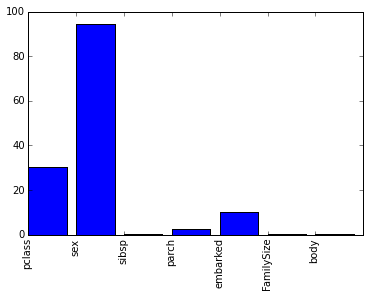

In [20]:
predictors = ["pclass", "sex", "sibsp", "parch", "embarked", "FamilySize", "body"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()